In [1]:
%cd /root/share/Real/KAIST/Production_management

%load_ext autoreload
%autoreload 2

/root/share/Real/KAIST/Production_management


In [2]:
import numpy as np
import pandas as pd
import datetime
import plotnine as p9
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
%matplotlib inline

In [22]:
data = pd.read_csv("Data/processed_data.csv", index_col=0).reset_index(drop=True)

In [23]:
data[(data['Date']=='2023-11-01')].index

Index([260], dtype='int64')

In [24]:
data.index = data['Date'].str.slice(start=5)

In [26]:
train_data = data[1:259]
test_data = data[260:] #11월

In [27]:
def evaluation(y_true, y_pred):
    test_data['Sales']
    print("MAD: {}, MAPD: {}".format(mean_absolute_error(y_true, y_pred), mean_absolute_percentage_error(y_true, y_pred)))

# Mean of day

In [75]:
mean_rep = train_data['Sales'].groupby(train_data['Weekday']).mean()
y_pred = mean_rep[test_data['Weekday']]
y_true = test_data['Sales']
evaluation(y_true, y_pred)

MAD: 167470.48300536672, MAPD: 0.19327509690105818


In [28]:
holiday = (train_data['Date'] < '2023-03-02') | ((train_data['Date'] > '2023-06-16') & (train_data['Date'] < '2023-08-28'))

In [29]:
train_data_hak = train_data[~holiday].copy()
mean_rep = train_data_hak['Sales'].groupby(train_data['Weekday']).mean()
y_pred = mean_rep[test_data['Weekday']]
y_true = test_data['Sales']
evaluation(y_true, y_pred)

MAD: 118961.9230769231, MAPD: 0.1437642480739542


In [53]:
tmp

,Forecast,True,Date
0,796708.333333,1062000,11-01
1,714780.000000,843000,11-02
2,678280.000000,845000,11-03
3,929708.333333,1025000,11-05
4,752960.000000,760000,11-06
5,701541.666667,708000,11-07
6,796708.333333,751000,11-08
7,714780.000000,775000,11-09
8,678280.000000,876000,11-10
9,929708.333333,630000,11-12


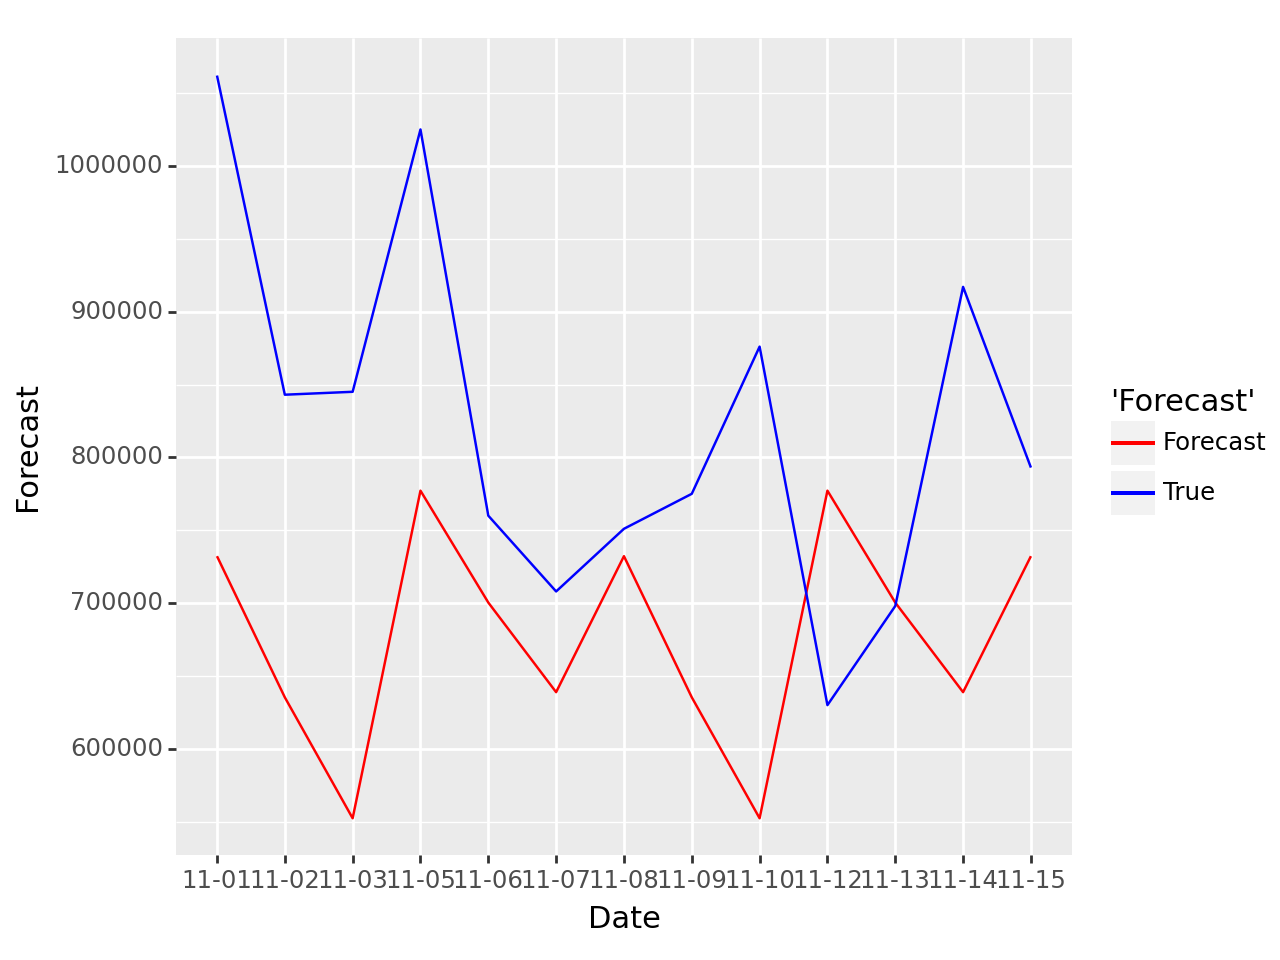

<Figure Size: (640 x 480)>

In [76]:
tmp = pd.DataFrame({'Forecast':np.array(y_pred), 'True':np.array(y_true), 'Date':y_true.index})
(p9.ggplot(tmp, p9.aes(x='Date', group=1)) 
    +p9.geom_line(p9.aes(y='Forecast', color="'Forecast'")) 
    +p9.geom_line(p9.aes(y='True', color="'True'"))
    +p9.scale_color_manual(values={
         'Forecast' : 'red',
         'True':'blue'
     }))

# Simple exponential smoothing

In [62]:
es1 = SimpleExpSmoothing(train_data['Sales'], initialization_method='estimated').fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.


In [63]:
es1.summary()

Dep. Variable:,Sales,No. Observations:,258
Model:,SimpleExpSmoothing,SSE,18401472334531.719
Optimized:,True,AIC,6451.547
Trend:,None,BIC,6458.653
Seasonal:,None,AICC,6451.705
Seasonal Periods:,None,Date:,"Sun, 19 Nov 2023"
Box-Cox:,False,Time:,07:31:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3043023,alpha,True
initial_level,6.8237e+05,l.0,True


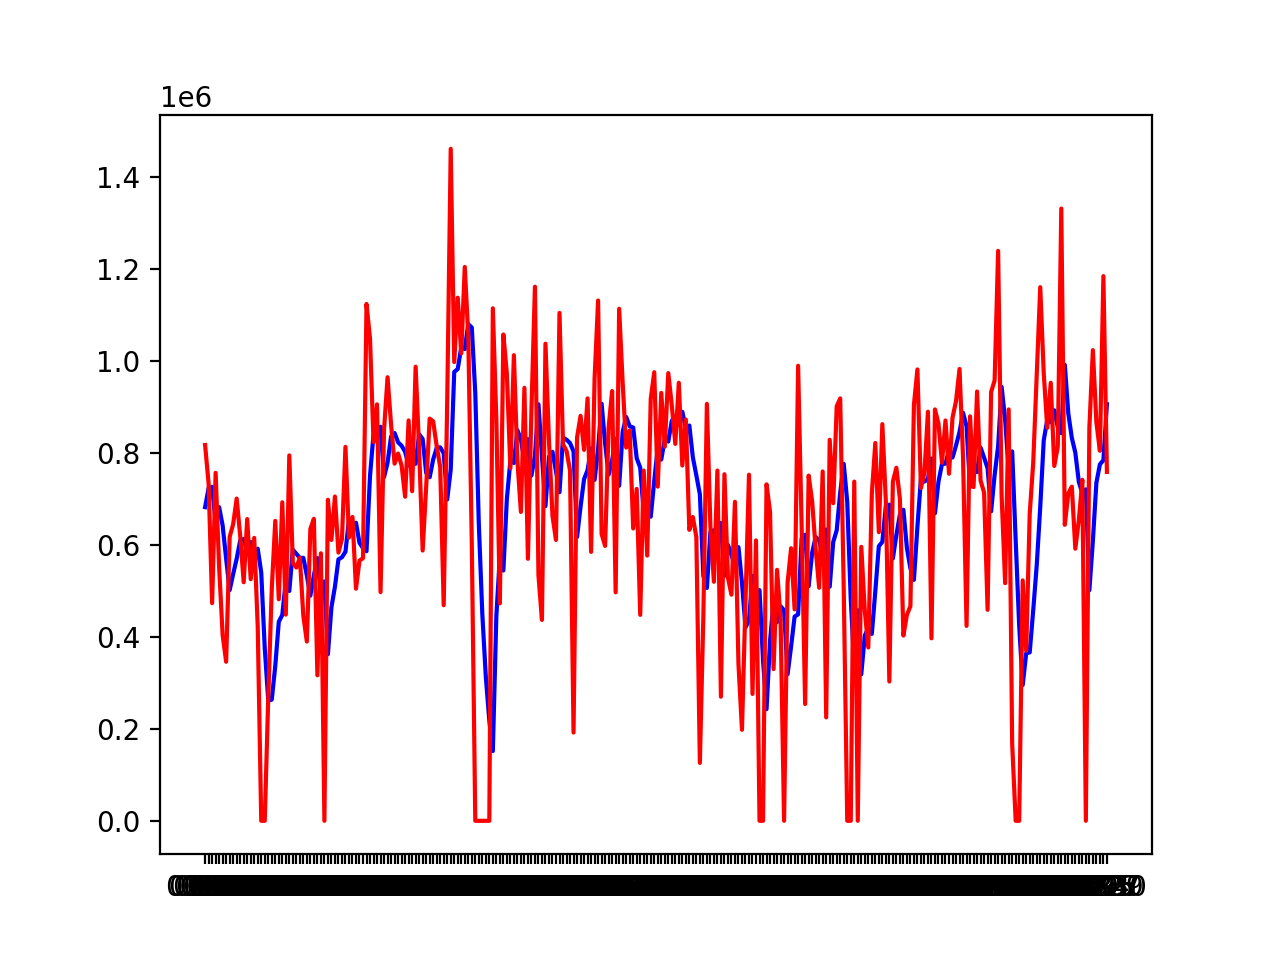

In [64]:
plt.plot(es1.fittedvalues, color="blue")
plt.plot(train_data['Sales'], color="red")

In [65]:
y_pred = es1.forecast(len(test_data))
y_true = test_data['Sales']

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


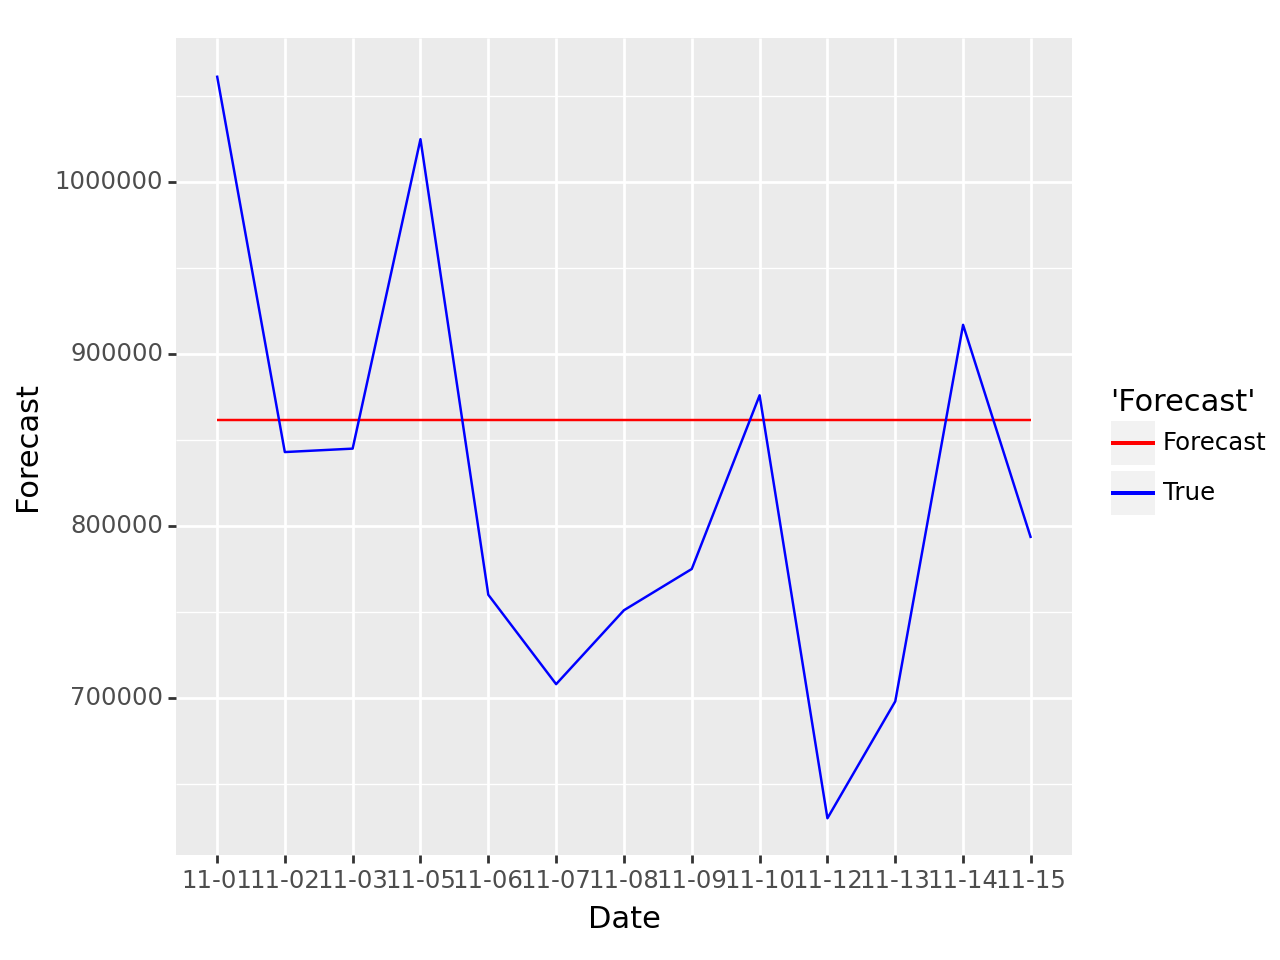

<Figure Size: (640 x 480)>

In [66]:
tmp = pd.DataFrame({'Forecast':np.array(y_pred), 'True':np.array(y_true), 'Date':y_true.index})
(p9.ggplot(tmp, p9.aes(x='Date', group=1)) 
    +p9.geom_line(p9.aes(y='Forecast', color="'Forecast'")) 
    +p9.geom_line(p9.aes(y='True', color="'True'"))
    +p9.scale_color_manual(values={
         'Forecast' : 'red',
         'True':'blue'
     }))

In [44]:
evaluation(y_true, y_pred)

MAD: 128766.03994732283, MAPD: 0.1686158286311952


# Adjusted exponential smoothing

In [69]:
es2 = ExponentialSmoothing(train_data['Sales'], initialization_method='estimated', trend='add').fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.


In [70]:
es2.summary()

Dep. Variable:,Sales,No. Observations:,258
Model:,ExponentialSmoothing,SSE,18713614962418.598
Optimized:,True,AIC,6459.887
Trend:,Additive,BIC,6474.099
Seasonal:,None,AICC,6460.221
Seasonal Periods:,None,Date:,"Sun, 19 Nov 2023"
Box-Cox:,False,Time:,07:34:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3350000,alpha,True
smoothing_trend,0.0139583,beta,True


In [71]:
y_pred = es2.forecast(len(test_data))
y_true = test_data['Sales']

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


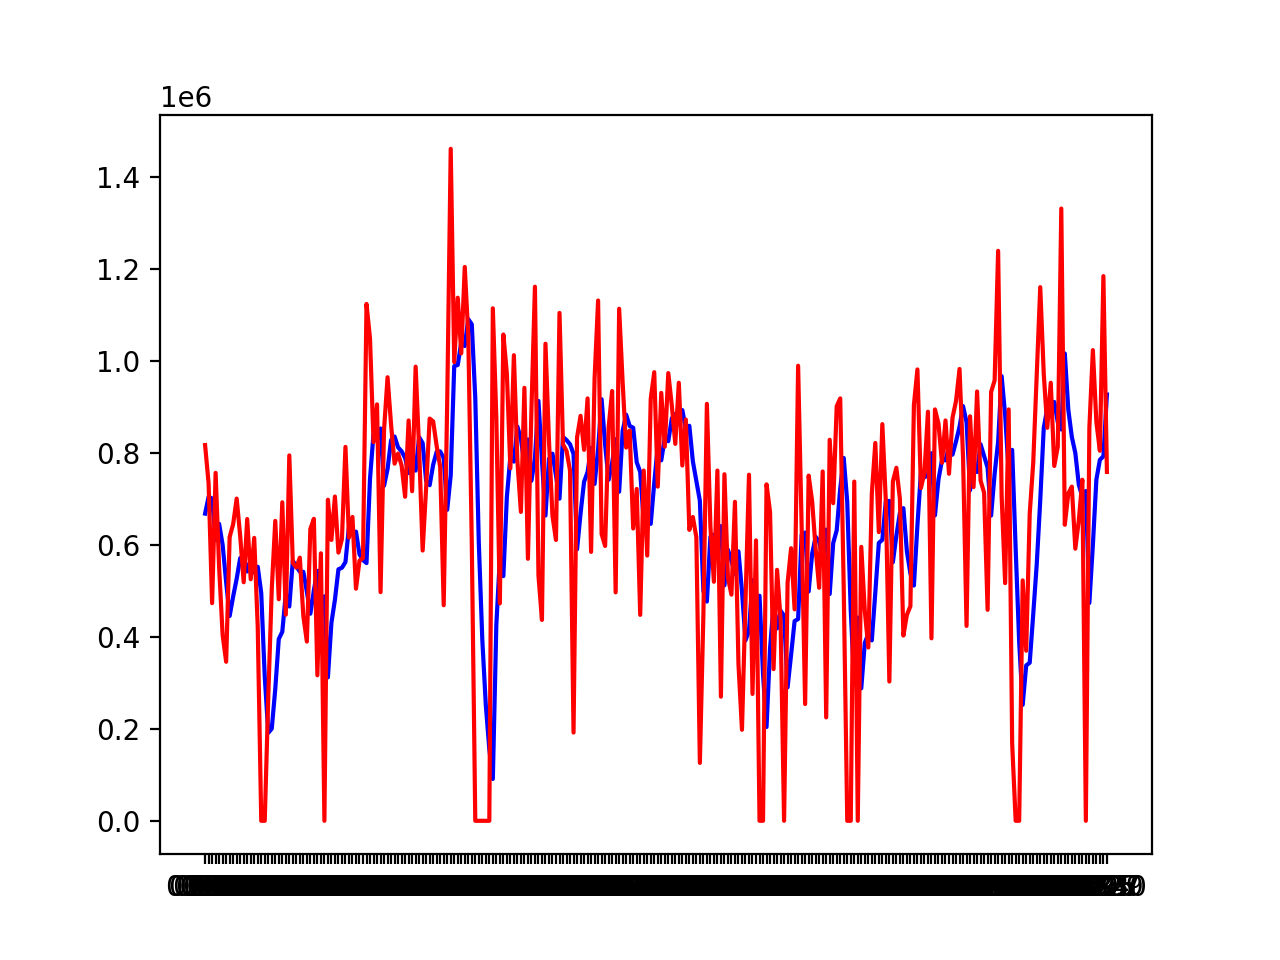

In [72]:
plt.plot(es2.fittedvalues, color="blue")
plt.plot(train_data['Sales'], color="red")

In [73]:
y_pred = es2.forecast(len(test_data))
y_true = test_data['Sales']

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


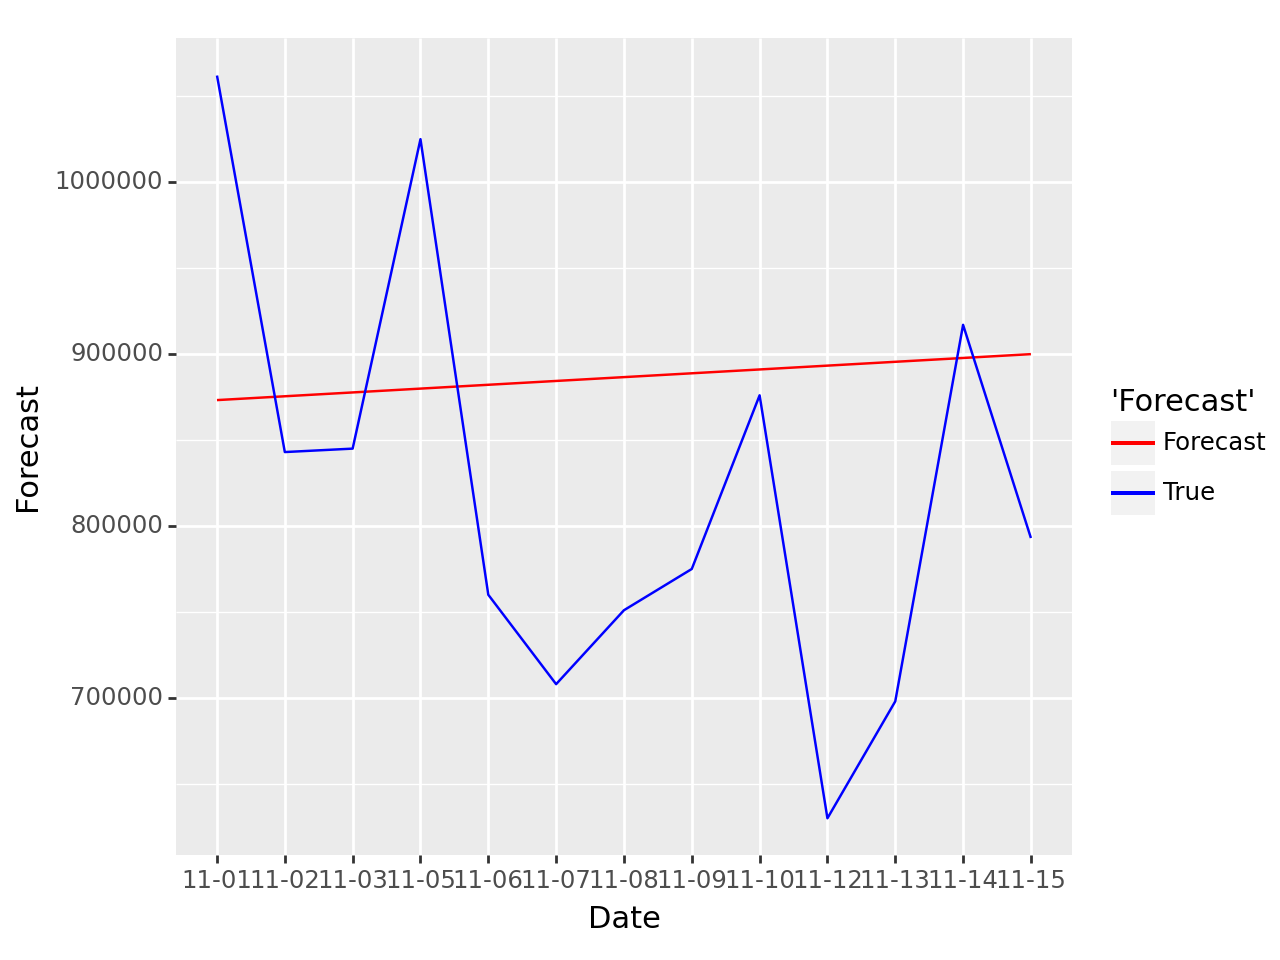

<Figure Size: (640 x 480)>

In [74]:
tmp = pd.DataFrame({'Forecast':np.array(y_pred), 'True':np.array(y_true), 'Date':y_true.index})
(p9.ggplot(tmp, p9.aes(x='Date', group=1)) 
    +p9.geom_line(p9.aes(y='Forecast', color="'Forecast'")) 
    +p9.geom_line(p9.aes(y='True', color="'True'"))
    +p9.scale_color_manual(values={
         'Forecast' : 'red',
         'True':'blue'
     }))

In [53]:
evaluation(y_true, y_pred)

MAD: 153693.72540635115, MAPD: 0.2023420010895684
